In [223]:
#Import Dependencies
from config import api_key
from citipy import citipy
import random
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time

In [224]:
#Observations:
    
#1. Latitudes from 0 to 20 seem to have the highest temperatures
#2. Most cities seem to have a humidity of 50% or higher
#3. Wind speeds rarely gets above 30mph in almost all the cities

In [225]:
# Getting a sample that is representative of the world cities.

# Set Lat & Lon Zones to randomly pick coordinates
lat_zone = np.arange(-90,90,15)
lon_zone = np.arange(-180,180,15)

cities_df = pd.DataFrame()

cities_df["Latitude"] = ""
cities_df["Longitude"] = ""

# Randomly pick coordinates and adding to the dataframe.
for x in lat_zone:
    for y in lon_zone:
        x_values = list(np.arange(x,x+15,0.1))
        y_values = list(np.arange(y,y+15,0.1))
        lats = random.sample(x_values,15)
        lons = random.sample(y_values,15)
        cities_df = cities_df.append(pd.DataFrame({"Latitude":lats,
                                       "Longitude":lons}))
cities_df = cities_df.reset_index(drop=True)

In [226]:
# For the coordinates, use citipy to associate them with nearest city.

for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index,"Closest City name",city.city_name)
    cities_df.set_value(index,"Closest Country code",city.country_code)

# Dropping random lat and lon samples from dataframe as they are not the exact coordinates for the cities.
final_cities_df = cities_df.drop(['Latitude', 'Longitude'],axis=1)

# Dropping duplicate cities which may have resulted in the previous step
final_cities_df = final_cities_df.drop_duplicates()
final_cities_df = final_cities_df.reset_index(drop=True)


C:\Users\Hannah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Hannah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [227]:
# Picking a sample of 500 cities to proceed with analysis
sample_cities = final_cities_df.sample(600)
sample_cities = sample_cities.reset_index(drop=True)

In [228]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
params = { "appid":api_key,"units":"imperial" }

In [229]:
def encrypt_key(input_url):
    return input_url[0:53]+"<YourKey>"+input_url[85:]

for index,row in sample_cities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Retrieving weather information for {params['q']}")
    weather_resp = requests.get(url,params)
    print(encrypt_key(weather_resp.url))
    weather_resp  = weather_resp.json()
    sample_cities.set_value(index,"Latitude",weather_resp.get("coord",{}).get("lat"))
    sample_cities.set_value(index,"Longitude",weather_resp.get("coord",{}).get("lon"))
    sample_cities.set_value(index,"Temperature",weather_resp.get("main",{}).get("temp_max"))
    sample_cities.set_value(index,"Wind speed",weather_resp.get("wind",{}).get("speed"))
    sample_cities.set_value(index,"Humidity",weather_resp.get("main",{}).get("humidity"))
    sample_cities.set_value(index,"Cloudiness",weather_resp.get("clouds",{}).get("all"))
    try:
        date = sample_cities["dt"]
        sample_cities.append(date)
    except(KeyError):
        continue

Retrieving weather information for tecoanapa,mx
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=tecoanapa%2Cmx
Retrieving weather information for havre-saint-pierre,ca


C:\Users\Hannah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Hannah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Hannah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Hannah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Hannah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: set_value is deprecated and will be removed in a future

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=havre-saint-pierre%2Cca
Retrieving weather information for okhotsk,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=okhotsk%2Cru
Retrieving weather information for abu kamal,sy
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=abu+kamal%2Csy
Retrieving weather information for atar,mr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=atar%2Cmr
Retrieving weather information for santa maria,cv
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=santa+maria%2Ccv
Retrieving weather information for minab,ir
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=minab%2Cir
Retrieving weather information for kamina,cd
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=kamina%2Ccd
Retrieving weather information for alofi,nu
http://api.openwea

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=belyy+yar%2Cru
Retrieving weather information for massakory,td
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=massakory%2Ctd
Retrieving weather information for barbar,sd
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=barbar%2Csd
Retrieving weather information for asau,tv
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=asau%2Ctv
Retrieving weather information for tiruvottiyur,in
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=tiruvottiyur%2Cin
Retrieving weather information for kangaba,ml
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=kangaba%2Cml
Retrieving weather information for grindavik,is
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=grindavik%2Cis
Retrieving weather information for kuche,cn
http://api.openwe

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=yokadouma%2Ccm
Retrieving weather information for saint-joseph,re
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=saint-joseph%2Cre
Retrieving weather information for chumikan,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=chumikan%2Cru
Retrieving weather information for praia da vitoria,pt
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=praia+da+vitoria%2Cpt
Retrieving weather information for saryshagan,kz
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=saryshagan%2Ckz
Retrieving weather information for marcona,pe
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=marcona%2Cpe
Retrieving weather information for janakpur,np
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=janakpur%2Cnp
Retrieving weather information fo

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=carahue%2Ccl
Retrieving weather information for salamiyah,sy
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=salamiyah%2Csy
Retrieving weather information for dingle,ie
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=dingle%2Cie
Retrieving weather information for pevek,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=pevek%2Cru
Retrieving weather information for jawhar,so
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=jawhar%2Cso
Retrieving weather information for searcy,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=searcy%2Cus
Retrieving weather information for lokosovo,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=lokosovo%2Cru
Retrieving weather information for kathmandu,np
http://api.openweathermap.org

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=warrington%2Cus
Retrieving weather information for mataura,pf
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=mataura%2Cpf
Retrieving weather information for karratha,au
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=karratha%2Cau
Retrieving weather information for shirvan,ir
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=shirvan%2Cir
Retrieving weather information for abnub,eg
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=abnub%2Ceg
Retrieving weather information for chagda,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=chagda%2Cru
Retrieving weather information for boende,cd
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=boende%2Ccd
Retrieving weather information for inirida,co
http://api.openweathermap.org/

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=kasangulu%2Ccd
Retrieving weather information for estevan,ca
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=estevan%2Cca
Retrieving weather information for borba,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=borba%2Cbr
Retrieving weather information for kiama,au
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=kiama%2Cau
Retrieving weather information for prince rupert,ca
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=prince+rupert%2Cca
Retrieving weather information for houma,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=houma%2Cus
Retrieving weather information for bethel,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=bethel%2Cus
Retrieving weather information for bredasdorp,za
http://api.openweatherma

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=solovetskiy%2Cru
Retrieving weather information for huntington,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=huntington%2Cus
Retrieving weather information for la libertad,sv
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=la+libertad%2Csv
Retrieving weather information for revda,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=revda%2Cru
Retrieving weather information for conceicao das alagoas,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=conceicao+das+alagoas%2Cbr
Retrieving weather information for rovaniemi,fi
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=rovaniemi%2Cfi
Retrieving weather information for half moon bay,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=half+moon+bay%2Cus
Retrieving weat

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=zapadnaya+dvina%2Cru
Retrieving weather information for malanje,ao
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=malanje%2Cao
Retrieving weather information for sakakah,sa
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=sakakah%2Csa
Retrieving weather information for middle island,kn
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=middle+island%2Ckn
Retrieving weather information for jamestown,sh
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=jamestown%2Csh
Retrieving weather information for miraflores,co
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=miraflores%2Cco
Retrieving weather information for cabedelo,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=cabedelo%2Cbr
Retrieving weather information for trelew

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=narsaq%2Cgl
Retrieving weather information for ginda,er
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=ginda%2Cer
Retrieving weather information for tiarei,pf
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=tiarei%2Cpf
Retrieving weather information for juneau,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=juneau%2Cus
Retrieving weather information for dudinka,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=dudinka%2Cru
Retrieving weather information for carnduff,ca
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=carnduff%2Cca
Retrieving weather information for jibou,ro
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=jibou%2Cro
Retrieving weather information for nhulunbuy,au
http://api.openweathermap.org/data/2

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=ngama%2Ctd
Retrieving weather information for maragogi,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=maragogi%2Cbr
Retrieving weather information for wilkie,ca
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=wilkie%2Cca
Retrieving weather information for labuan,my
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=labuan%2Cmy
Retrieving weather information for remedios,cu
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=remedios%2Ccu
Retrieving weather information for san ramon de la nueva oran,ar
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=san+ramon+de+la+nueva+oran%2Car
Retrieving weather information for queimadas,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=queimadas%2Cbr
Retrieving weather information fo

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=povenets%2Cru
Retrieving weather information for ende,id
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=ende%2Cid
Retrieving weather information for kiruna,se
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=kiruna%2Cse
Retrieving weather information for thai binh,vn
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=thai+binh%2Cvn
Retrieving weather information for cherskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=cherskiy%2Cru
Retrieving weather information for kavieng,pg
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=kavieng%2Cpg
Retrieving weather information for fukue,jp
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=imperial&q=fukue%2Cjp
Retrieving weather information for lodja,cd
http://api.openweathermap.org/data

In [230]:
# Drop cities with missing information, display dataframe
sample_cities = sample_cities.dropna()
sample_cities.to_csv("weather_data.csv")
sample_cities.head()

,Closest City name,Closest Country code,Latitude,Longitude,Temperature,Wind speed,Humidity,Cloudiness
0,tecoanapa,mx,16.99,-99.26,89.60,3.36,66.0,40.0
1,havre-saint-pierre,ca,50.23,-63.60,55.40,4.70,50.0,20.0
2,okhotsk,ru,59.36,143.24,54.77,3.60,55.0,8.0
3,abu kamal,sy,34.45,40.92,67.46,8.97,33.0,0.0
4,atar,mr,20.52,-13.05,80.15,4.61,50.0,92.0


In [231]:
# Counting data in dataframe
sample_cities.count()

Closest City name       521
Closest Country code    521
Latitude                521
Longitude               521
Temperature             521
Wind speed              521
Humidity                521
Cloudiness              521
dtype: int64

In [232]:
# Set date for charts
set_date = time.strftime("(%m/%d/%Y)")


In [233]:
# Setting plot function
def plotting_scatter(x_title,x_lim,y_title):
    plt.title(f"{y_title} vs {x_title} {set_date}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.xlim(x_lim)

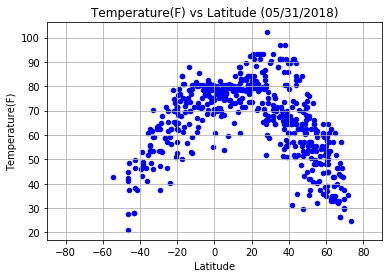

In [234]:
# Temperature vs Latitude Scatter Plot
sample_cities.plot(kind="scatter",x="Latitude",y="Temperature",grid=True,color="blue")

plotting_scatter("Latitude",[-90,90],"Temperature(F)")
plt.savefig("Temperature vs Latitude")
plt.show()

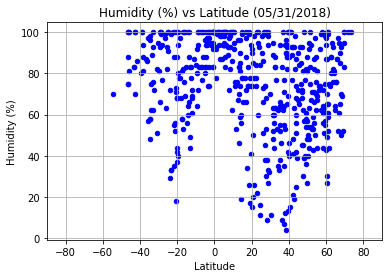

In [235]:
# Humidity vs Latitude Scatter Plot

sample_cities.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,color="blue")

plotting_scatter("Latitude",[-90,90],"Humidity (%)")
plt.savefig("Humidity vs Latitude")
plt.show()

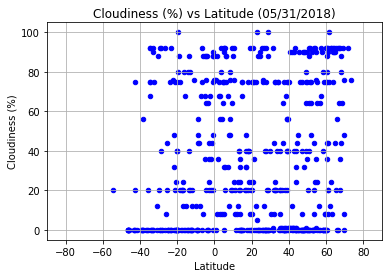

In [236]:
# Cloudiness vs Latitude Scatter Plot
sample_cities.plot(kind="scatter",x="Latitude",y="Cloudiness",grid=True,color="blue")

plotting_scatter("Latitude",[-90,90],"Cloudiness (%)")
plt.savefig("Cloudiness vs Latitude")
plt.show()

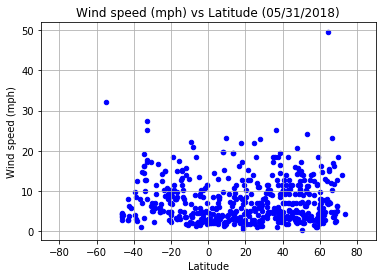

In [237]:
# Wind speed vs Latitude Scatter Plot
sample_cities.plot(kind="scatter",x="Latitude",y="Wind speed",grid=True,color="blue")

plotting_scatter("Latitude",[-90,90],"Wind speed (mph)")
plt.savefig("Wind speed vs Latitude")
plt.show()